# Graph Visualization

The dataset being worked with is the Amazon Product Co-Purchasing Network, collected on June 1, 2003. It is provided by the Stanford Large Network Dataset Collection ([SNAP](https://snap.stanford.edu/data/)). The data can be briefly described as:

```
Network was collected by crawling Amazon website. It is based on Customers Who Bought This Item Also Bought feature of the Amazon website. If a product i is frequently co-purchased with product j, the graph contains a directed edge from i to j.
```

The data can be found from [here](https://snap.stanford.edu/data/amazon0601.html)

## Import Packages

In [27]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

## Import Data File

The data file is a simple text file with its structure looking like the following:



In [28]:
# Read the file, skipping the header lines starting with '#'
with open("Amazon0601.txt", "r", encoding="utf-8") as file:
    lines = file.readlines()

# Extract edges (skip commented lines)
edges = []
for line in lines:
    if not line.startswith("#"):  # Ignore comments
        parts = line.strip().split("\t")
        if len(parts) == 2:
            edges.append((int(parts[0]), int(parts[1])))

In [ ]:
# Convert to DataFrame
df_graph = pd.DataFrame(edges, columns=["FromNodeId", "ToNodeId"])

# Display DataFrame
print(df_graph.head())

## Data Wrangling 

Details

## Exploratory Data Analysis

## NetworkX

The networkx package allows us to take this pandas format and create a new graph based on the **director** and **cast** relationship using the *from_pandas_edgelist()* function. For more information and additional example, you can check their documentation [here](https://networkx.org/nx-guides/content/exploratory_notebooks/facebook_notebook.html).

In [6]:
G = nx.from_pandas_edgelist(explode_df, "director", "cast")

### Random Layout

We can see all the connections between directors and cast members, while keeping their labels off as it would clutter up the graph

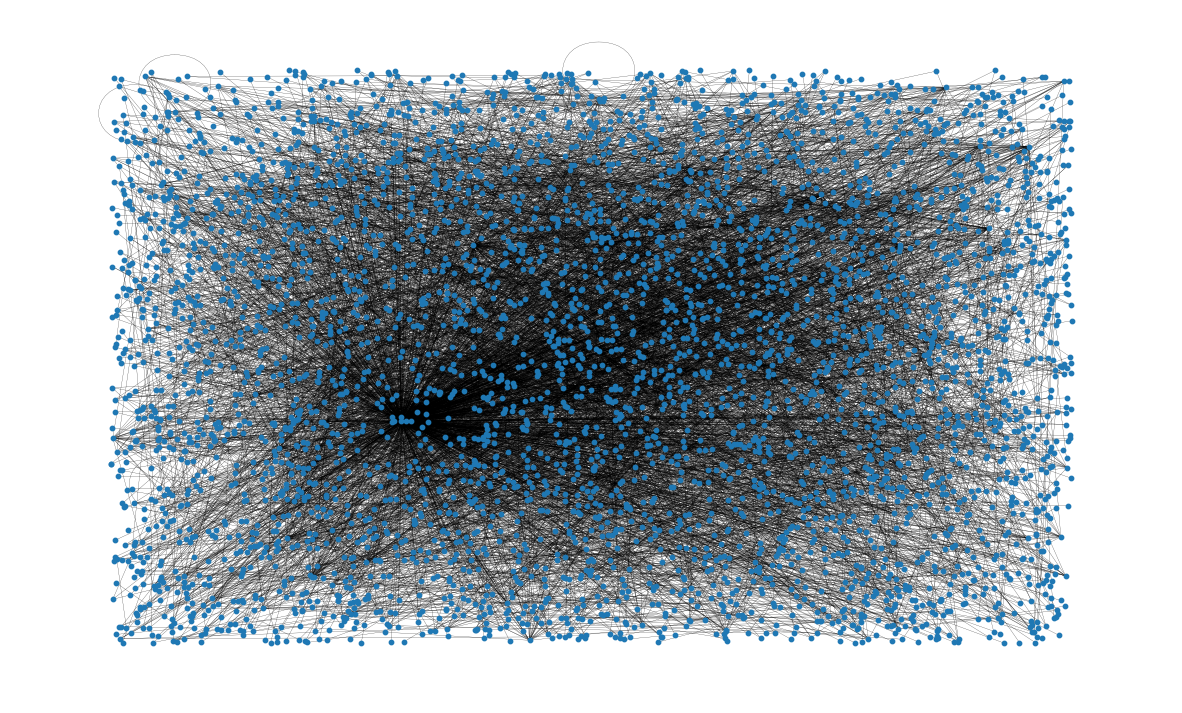

In [7]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}

nx.draw_networkx(G, pos=nx.random_layout(G), ax=ax, **plot_options)

However, it's quite busy and not as informative in its current state. Let's first maybe focus on a specific genre such as "Superhero". This is better than before and we begin to see some nodes having more edges than others.

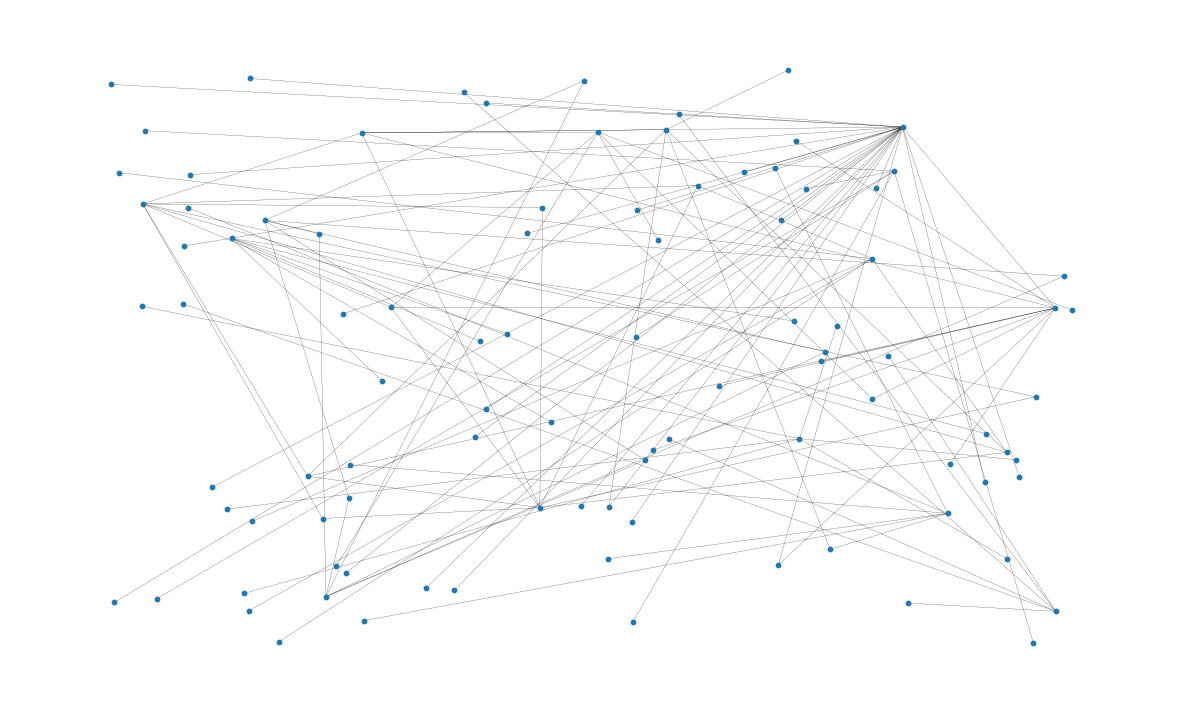

In [8]:
genre_df = explode_df[explode_df['genre'].isin(['Superhero'])]

G = nx.from_pandas_edgelist(genre_df, "director", "cast")

fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}

nx.draw_networkx(G, pos=nx.random_layout(G), ax=ax, **plot_options)

### Spring Layout

The problem with *random_layout()*, is that we cannot control reproducibility. Instead, *spring_layout()* allows us to set a seed so that the graph can stay consistent. What it also does is show us how these connections are exactly connected properly with their edges and how some of the nodes of importance are more clustered on their own compared to before. 

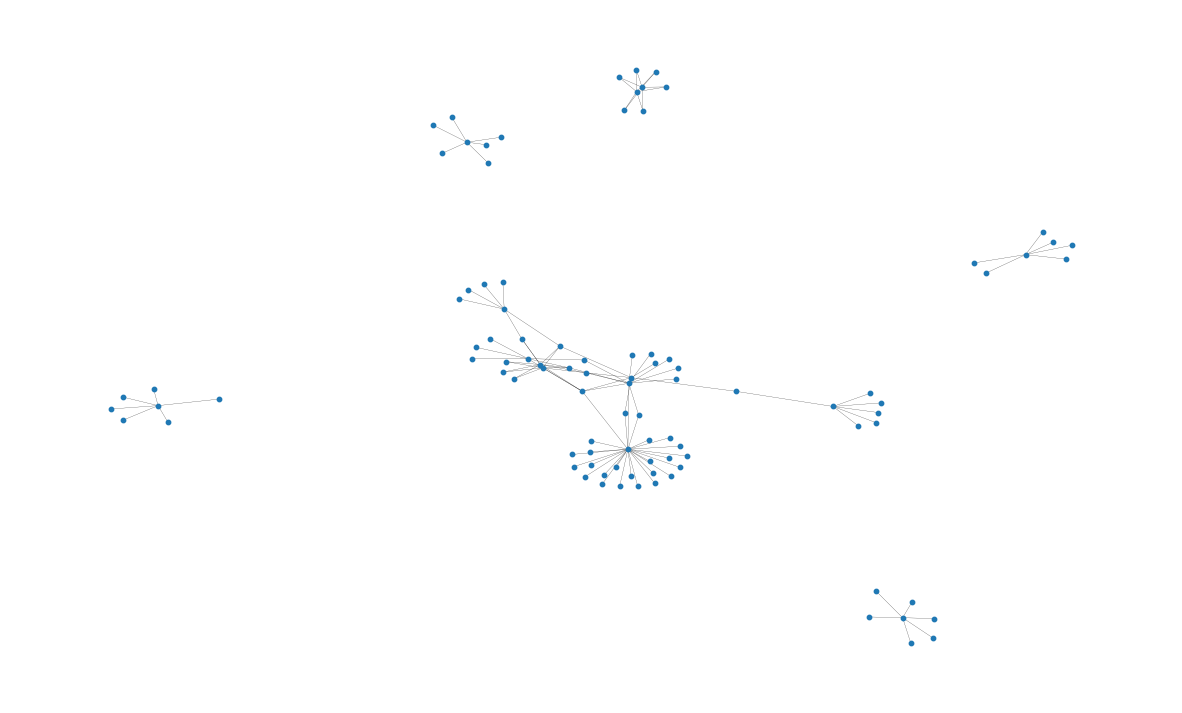

In [9]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}

nx.draw_networkx(G, pos=nx.spring_layout(G, seed=123), ax=ax, **plot_options)

Trying to add labels in becomes cluttered still and requires more research on how to make a better graph than this. 

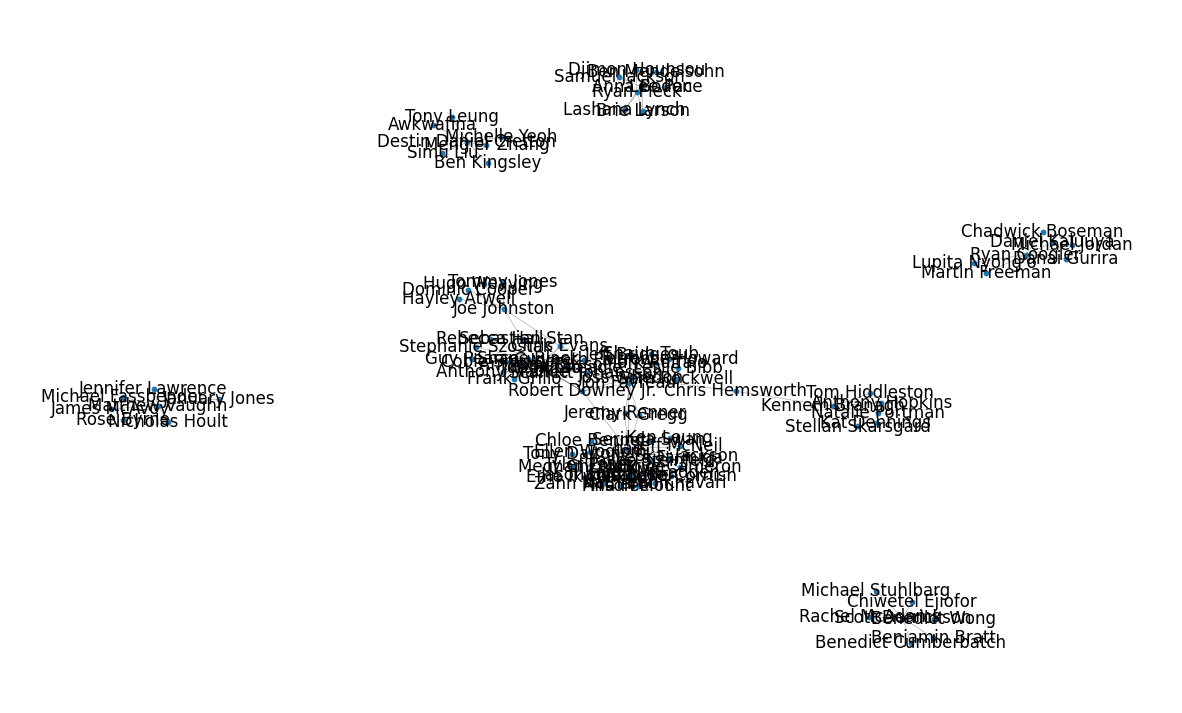

In [10]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": True, "width": 0.15}

nx.draw_networkx(G, pos=nx.spring_layout(G, seed=123), ax=ax, **plot_options)

### Bipartite Layout

Another interesting layout we explored was *bipartite_layout()*. However, this layout is not ideal because nodes should not connect within the same group, making it less suitable for our data. For example, multiple directors may work on the same TV show or movie, meaning our edges do not have a strict separation between the two node groups.

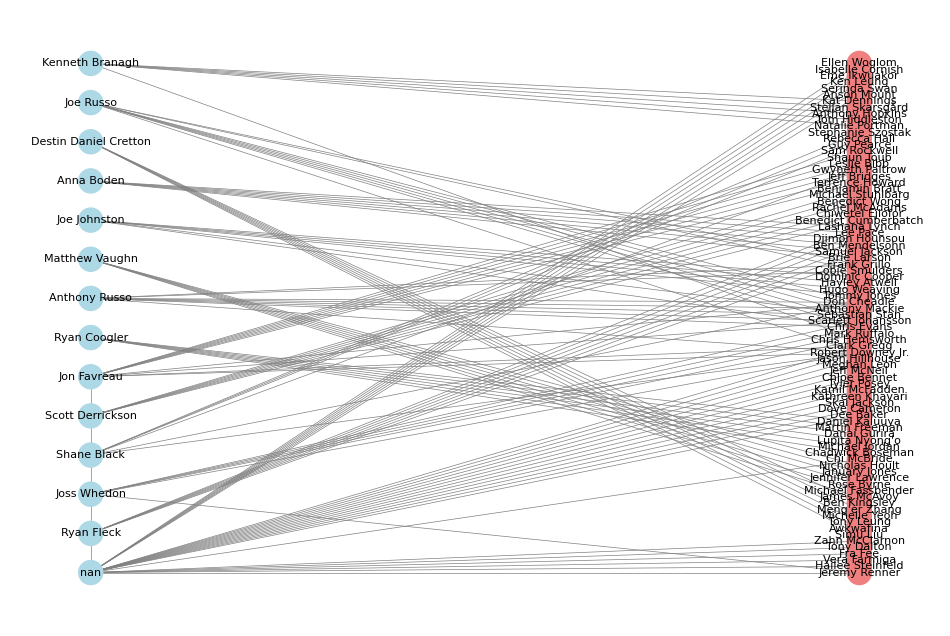

In [11]:
G = nx.from_pandas_edgelist(genre_df, "director", "cast")

directors = set(genre_df["director"])
cast = set(genre_df["cast"])

color_map = ["lightblue" if node in directors else "lightcoral" for node in G.nodes]

pos = nx.bipartite_layout(G, directors)

fig, ax = plt.subplots(figsize=(12, 8))
ax.axis("off")

nx.draw(
    G, 
    pos, 
    ax=ax, 
    node_color=color_map, 
    edge_color="gray",
    node_size=300, 
    with_labels=True,
    font_size=8, 
    width=0.5
)
plt.show()

## Conclusion

We have demonstrated how to transform our data from pandas into different formats to display a network. However, there is still much more to explore, even simple tasks like labeling nodes can be done more effectively. With further research, we can use techniques such as centrality measurements to identify and label the most important nodes while ignoring less significant ones on the fringes of the graph.

   FromNodeId  ToNodeId
0           0         1
1           0         2
2           0         3
3           0         4
4           0         5


metadata https://snap.stanford.edu/data/amazon-meta.html